# purr와 broom

중첩된 데이터(Nested Data), 리스트-열(중첩, 벡터화 함수, 다중값 요약), broom

In [7]:
library('tidyverse')
library('modelr')
library('gapminder') # 기대 수명과 GDP와 같은 통계량을 통해 시간의 경과에 따른 국가의 변천을 요약

## 보충 필요 ★★(전체적으로 이해 못함)

- 많은 양의 모델을 쉽게 작업할 수 있도록 하는 세 가지 아이디어를 알아보면

> 1) 간단한 모델을 여러 개 사용하여 복잡한 데이터셋을 잘 이해한다.<br>
2) 리스트-열(리스트 형식의 열)을 사용하여 임의의 데이터 구조를 데이터 프레임에 저장한다. 예를 들어 리스트-열은 선형 모델을 포함하는 열을 가질 수 있다.<br>
3) broom 패키지를 사용하여 모델을 타이디 데이터로 변환한다. 타이디 데이터가 존재한다면 이전에 배운 기법들을 적용할 수 있으므로 이는 많은 양의 모델을 작업할 수 있는 좋은 기법이다.

### gapminder 데이터

In [8]:
gapminder %>% head

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


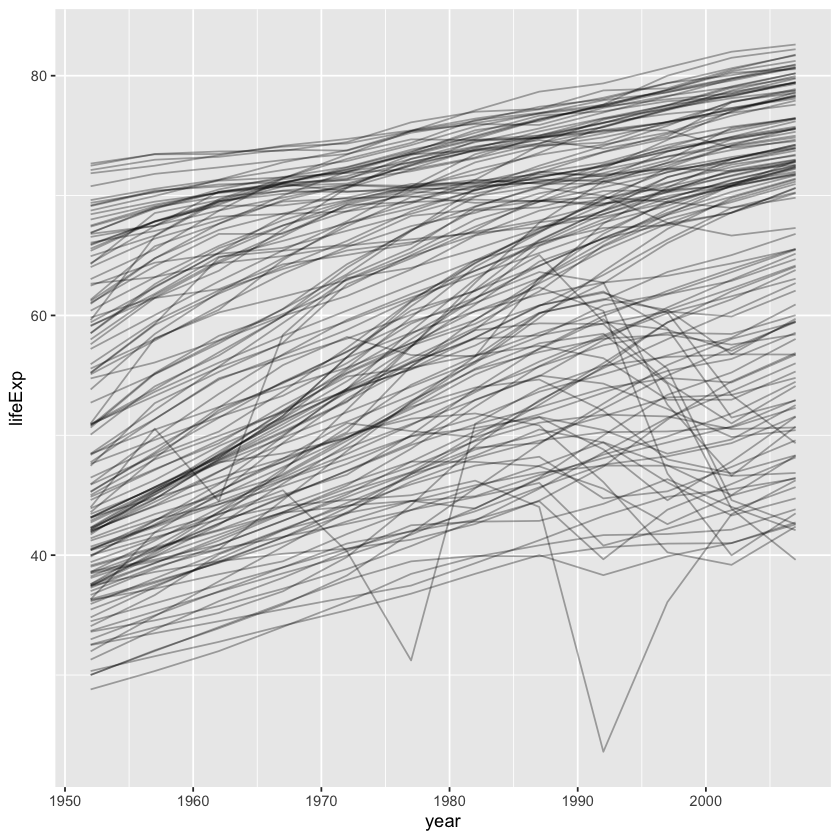

In [9]:
gapminder %>%
ggplot(aes(year, lifeExp, group = country)) +
geom_line(alpha = 1/3)

- 전반적으로는 기대 수명이 꾸준히 증가하고 있는 것처럼 보이지만 자세히 살펴보면 이 패턴을 따르지 않는 국가들이 일부 존재하는 것을 알 수 있다.<br>
이 국가들을 보기 쉽게 만들려면, 즉 숨겨진 추세를 확인하기 어렵게 만드는 강한 신호(전반적인 선형 추세)가 존재할 때, 선형 추세 모델을 적합하여 이 요소들을
구분할 것이다. 모델은 시간에 따라 꾸준히 증가하는 추세를 포착하고 잔차는 남아있는 추세를 보여줄 것이다.


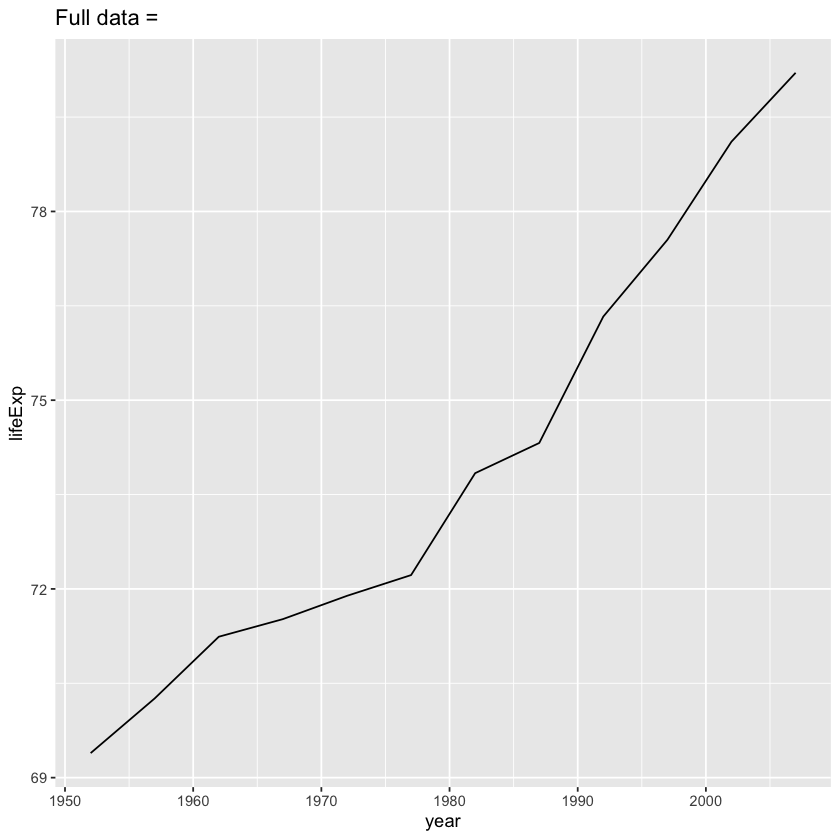

In [10]:
nz <- filter(gapminder, country == "New Zealand")
nz %>%
ggplot(aes(year, lifeExp)) +
geom_line() +
ggtitle("Full data = ")

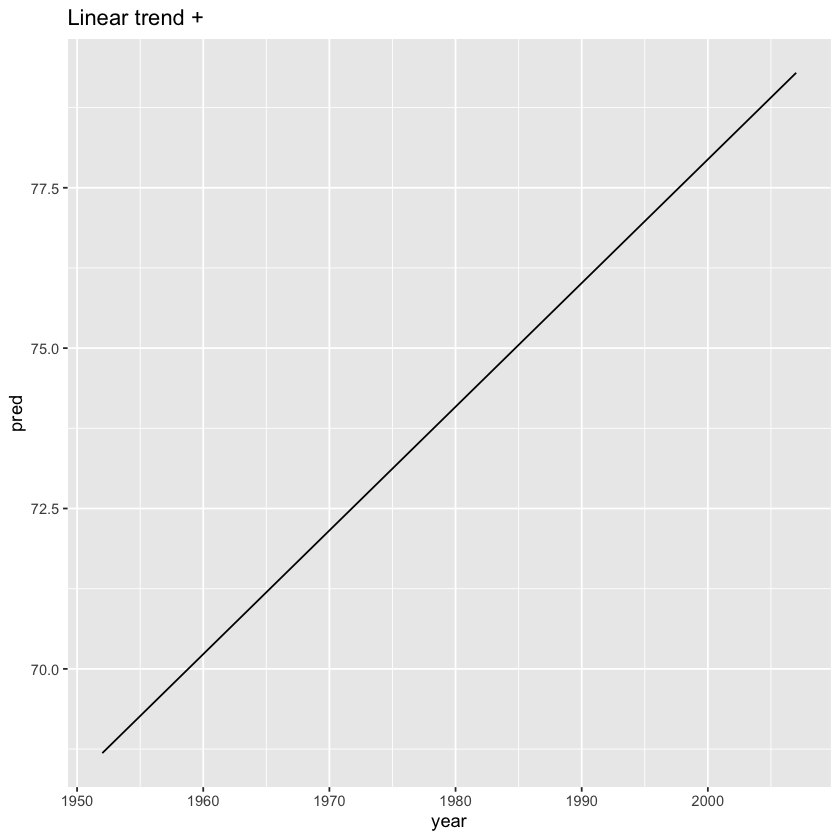

In [11]:
nz_mod <- lm(lifeExp ~ year, data = nz)
nz %>%
add_predictions(nz_mod) %>%
ggplot(aes(year, pred)) +
geom_line() +
ggtitle("Linear trend + ")

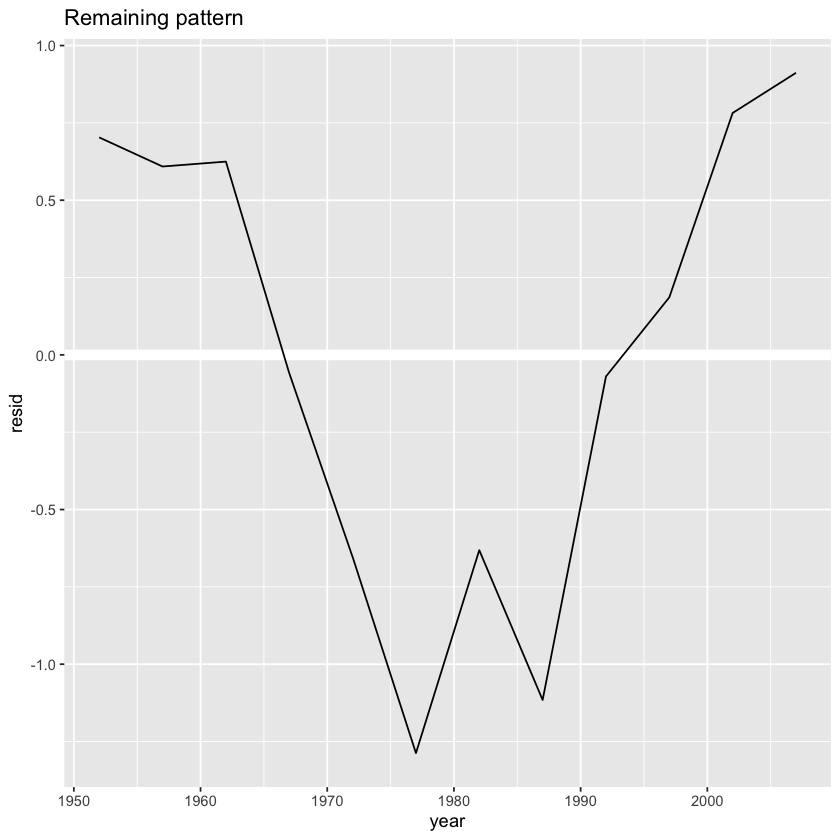

In [12]:
nz %>%
add_residuals(nz_mod) %>%
ggplot(aes(year, resid)) +
geom_hline(yintercept = 0, color = "white", size = 3) +
geom_line() +
ggtitle("Remaining pattern")

### 중첩된 데이터(Nested Data)

- `group_by`로 묶어놓고 그에 해당하는 나머지 항목들 리스트(같은 데이터 프레임)로 묶어 정리

In [13]:
by_country <- gapminder %>%
group_by(country, continent) %>%
nest()

by_country %>% head

country,continent,data
<fct>,<fct>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231"
Argentina,Americas,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 62.485, 64.399, 65.142, 65.634, 67.065, 68.481, 69.942, 70.774, 71.868, 73.275, 74.340, 75.320, 17876956.000, 19610538.000, 21283783.000, 22934225.000, 24779799.000, 26983828.000, 29341374.000, 31620918.000, 33958947.000, 36203463.000, 38331121.000, 40301927.000, 5911.315, 6856.856, 7133.166, 8052.953, 9443.039, 10079.027, 8997.897, 9139.671, 9308.419, 10967.282, 8797.641, 12779.380"
Australia,Oceania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 69.120, 70.330, 70.930, 71.100, 71.930, 73.490, 74.740, 76.320, 77.560, 78.830, 80.370, 81.235, 8691212.000, 9712569.000, 10794968.000, 11872264.000, 13177000.000, 14074100.000, 15184200.000, 16257249.000, 17481977.000, 18565243.000, 19546792.000, 20434176.000, 10039.596, 10949.650, 12217.227, 14526.125, 16788.629, 18334.198, 19477.009, 21888.889, 23424.767, 26997.937, 30687.755, 34435.367"


In [14]:
by_country$data[[1]]

year,lifeExp,pop,gdpPercap
<int>,<dbl>,<int>,<dbl>
1952,28.801,8425333,779.4453
1957,30.332,9240934,820.8530
1962,31.997,10267083,853.1007
1967,34.020,11537966,836.1971
1972,36.088,13079460,739.9811
1977,38.438,14880372,786.1134
1982,39.854,12881816,978.0114
1987,40.822,13867957,852.3959
1992,41.674,16317921,649.3414


### 리스트-열

- 중첩된 데이터프레임에 모델 적합해보기

In [15]:
country_model <- function(df){
    lm(lifeExp ~ year, data = df)
    }

In [16]:
models <- map(by_country$data, country_model)

In [17]:
models %>% head

[[1]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  


[[2]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -594.0725       0.3347  


[[3]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
 -1067.8590       0.5693  


[[4]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -376.5048       0.2093  


[[5]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -389.6063       0.2317  


[[6]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -376.1163       0.2277  



- 보기 어려운 형태로 저장되므로 보기 좋게 데이터 프레임 형식으로 저장하기

In [18]:
by_country <- by_country %>%
mutate(model = map(data, country_model))

by_country %>% head

country,continent,data,model
<fct>,<fct>,<list>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 55.23, 59.28, 64.82, 66.22, 67.69, 68.93, 70.42, 72, 71.581, 72.95, 75.651, 76.423, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367","-1067.859, 0.5692797, -0.2979744, -0.536373, -0.7647716, -0.5071702, -0.2425688, 0.4070326, 0.914634, 2.499235, 1.597837, 0.1594382, -0.8449604, -2.384359, -204.4865, 34.03798, -0.6280719, -0.4013136, -0.1675554, 0.4512029, 0.9279612, 2.481719, 1.549478, 0.08023599, -0.9550057, -2.525247, 2, 43.37497, 46.22137, 49.06777, 51.91417, 54.76057, 57.60697, 6

- 이 방법의 장점은 모든 관련 객체가 함께 저장되므로 필터링하거나 정렬할 때 수동으로 동기화할 필요가 없다.

In [19]:
by_country %>%
filter(continent == "Europe") %>%
head

country,continent,data,model
<fct>,<fct>,<list>,<list>
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 55.23, 59.28, 64.82, 66.22, 67.69, 68.93, 70.42, 72, 71.581, 72.95, 75.651, 76.423, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Austria,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 66.800, 67.480, 69.540, 70.140, 70.630, 72.170, 73.180, 74.940, 76.040, 77.510, 78.980, 79.829, 6927772.000, 6965860.000, 7129864.000, 7376998.000, 7544201.000, 7568430.000, 7574613.000, 7578903.000, 7914969.000, 8069876.000, 8148312.000, 8199783.000, 6137.076, 8842.598, 10750.721, 12834.602, 16661.626, 19749.422, 21597.084, 23687.826, 27042.019, 29095.921, 32417.608, 36126.493","-405.9205, 0.2419923, 0.3515385, -0.1784231, 0.6716154, 0.06165385, -0.6583077, -0.3282692, -0.5282308, 0.02180769, -0.08815385, 0.1718846, 0.4319231, 0.07096154, -253.2371, 14.46904, 0.6311732, 0.004321666, -0.7325299, -0.4193814, -0.636233, -0.1030846, -0.2299361, 0.01321234, 0.2563608, -0.1214908, 2, 66.44846, 67.65842, 68.86838, 70.07835, 71.28831, 72.49827, 73.70823, 74.91819, 76.12815, 77.33812, 78.54808, 79.75804, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 66.8, 67.48, 69.54, 70.14, 70.63, 72.17, 73.18, 74.94, 76.04, 77.51, 78.98, 79.829, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Belgium,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 68.000, 69.240, 70.250, 70.940, 71.440, 72.800, 73.930, 75.350, 76.460, 77.530, 78.320, 79.441, 8730405.000, 8989111.000, 9218400.000, 9556500.000, 9709100.000, 9821800.000, 9856303.000, 9870200.000, 10045622.000, 10199787.000, 10311970.000, 10392226.000, 8343.105, 9714.961, 10991.207, 13149.041, 16672.144, 19117.974, 20979.846, 22525.563, 25575.571, 27561.197, 30485.884, 33692.605","-340.2412, 0.2090846, 0.1080769, 0.3026538, 0.2672308, -0.08819231, -0.6336154, -0.3190385, -0.2344615, 0.1401154, 0.2046923, 0.2292692, -0.02615385, 0.04942308, -255.1025, 12.50144, 0.2015463, -0.1355897, -0.6627256, -0.3298616, -0.2269975, 0.1658665, 0.2487306, 0.2915946, 0.05445866, 0.1483227, 2, 67.89192, 68.93735, 69.98277, 71.02819, 72.07362, 73.11904, 74.16446, 75.20988, 76.25531, 77.30073, 78.34615, 79.39158, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 

In [20]:
by_country %>%
arrange(continent, country) %>% 
head

country,continent,data,model
<fct>,<fct>,<list>,<list>
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367","-1067.859, 0.5692797, -0.2979744, -0.536373, -0.7647716, -0.5071702, -0.2425688, 0.4070326, 0.914634, 2.499235, 1.597837, 0.1594382, -0.8449604, -2.384359, -204.4865, 34.03798, -0.6280719, -0.4013136, -0.1675554, 0.4512029, 0.9279612, 2.481719, 1.549478, 0.08023599, -0.9550057, -2.525247, 2, 43.37497, 46.22137, 49.06777, 51.91417, 54.76057, 57.60697, 60.45337, 63.29976, 66.14616, 68.99256, 71.83896, 74.68536, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231","-376.5048, 0.2093399, -2.111654, -1.174353, -0.2200524, 0.7182483, 1.614549, 2.12285, 1.53515, 0.452451, 0.1467517, -0.5839476, -1.590647, -0.9093462, -131.2323, 12.5167, 0.3574398, 1.24968, 2.099921, 2.562161, 1.928402, 0.799642, 0.4478825, -0.3288771, -1.381637, -0.7463962, 2, 32.12665, 33.17335, 34.22005, 35.26675, 36.31345, 37.36015, 38.40685, 39.45355, 40.50025, 41.54695, 42.59365, 43.64035, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 30.015, 31.999, 34, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Benin,Africa,"1952.0000, 1957.0000, 1962.0000, 1967.0000, 1972.0000, 1977.0000, 1982.0000, 1987.0000, 1992.0000, 1997.0000, 2002.0000, 2007.0000, 38.2230, 40.3580, 42.6180, 44.8850, 47.0140, 49.1900, 50.9040, 52.3370, 53.9190, 54.7770, 54.4060, 56.7280, 1738315.0000, 1925173.0000, 2151895.0000, 2427334.0000, 2761407.0000, 3168267.0000, 3641603.0000, 4243788.0000, 4981671.0000, 6066080.0000, 7026113.0000, 8078314.0000, 1062.7522, 959.6011, 949.4991, 1035.8314, 1085.7969, 1029.1613, 1277.8976, 1225.8560, 1191.2077, 1232.9753, 1372.8779, 1441.2849","-612.834, 0.3342329, -1.365513, -0.9016772, -0.3128415, 0.2829942, 0.7408298, 1.245666, 1.288501, 1.050337, 0.9611725, 0.1480082, -1.894156, -1.243321, -168.9786, 19.98422, 0.08178907, 0.6384955, 1.057202, 1.522908, 1.526615, 1.249321, 1.121028, 0.2687342, -1.812559, -1.200853, 2, 39.58851, 41.25968, 42.93084, 44.60201, 46.27317, 47.94433, 49.6155, 51.28666, 52.95783, 54.62899, 56.30016, 57.97132, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 

- 데이터프레임의 리스트와 모델의 리스트가 분리된 객체인 경우, 하나의 벡터를 재정렬하거나 하위 집합으로 만들 때마다 동기화하기 위해 다른 모든 것을 재정렬하거나
하위 집합으로 만들어야 한다. 만약 이 부분을 놓치게 된다면 코드는 계속 작동하지만 잘못된 결과를 제공할 것이다.

### 중첩 해제하기(Unnesting)

In [21]:
by_country <- by_country %>%
mutate(
    resids = map2(data, model, add_residuals)
    )
by_country %>% head

country,continent,data,model,resids
<fct>,<fct>,<list>,<list>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02, -1.106295e+00, -9.519382e-01, -6.635816e-01, -1.722494e-02, 6.741317e-01, 1.647488e+00, 1.686845e+00, 1.278202e+00, 7.535583e-01, -5.340851e-01, -1.544728e+00, -1.222372e+00"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 55.23, 59.28, 64.82, 66.22, 67.69, 68.93, 70.42, 72, 71.581, 72.95, 75.651, 76.423, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+0

- 데이터프레임 리스트를 플롯으로 나타내기

In [22]:
resids <- unnest(by_country, resids)
resids %>% head

country,continent,data,model,year,lifeExp,pop,gdpPercap,resid
<fct>,<fct>,<list>,<list>,<int>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007",1952,28.801,8425333,779.4453,-1.10629487
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007",1957,30.332,9240934,820.8530,-0.95193823
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.7944

- 보통의 열은 중첩된 열의 행으로 한 번씩 반복되지만 이제는 일반적인 데이터프레임을 가지고 있으므로 잔차를 플롯으로 나타낼 수 있다.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



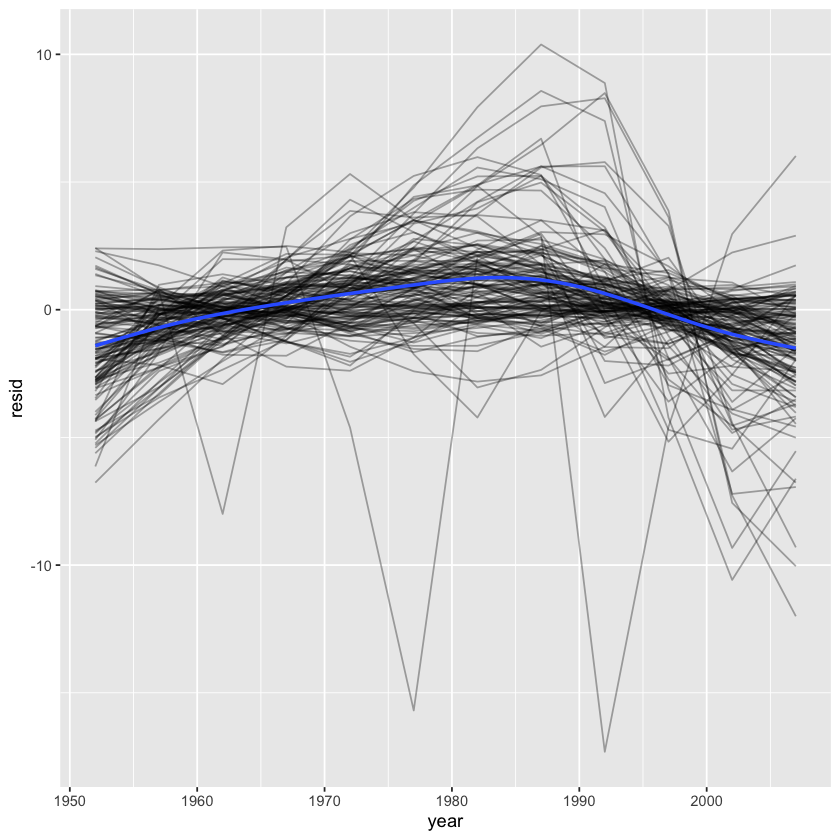

In [23]:
resids %>%
ggplot(aes(year, resid)) +
geom_line(aes(group = country), alpha = 1/3) +
geom_smooth(se = FALSE)

- 플롯을 대륙으로 면분할하면 더 잘 나타난다.

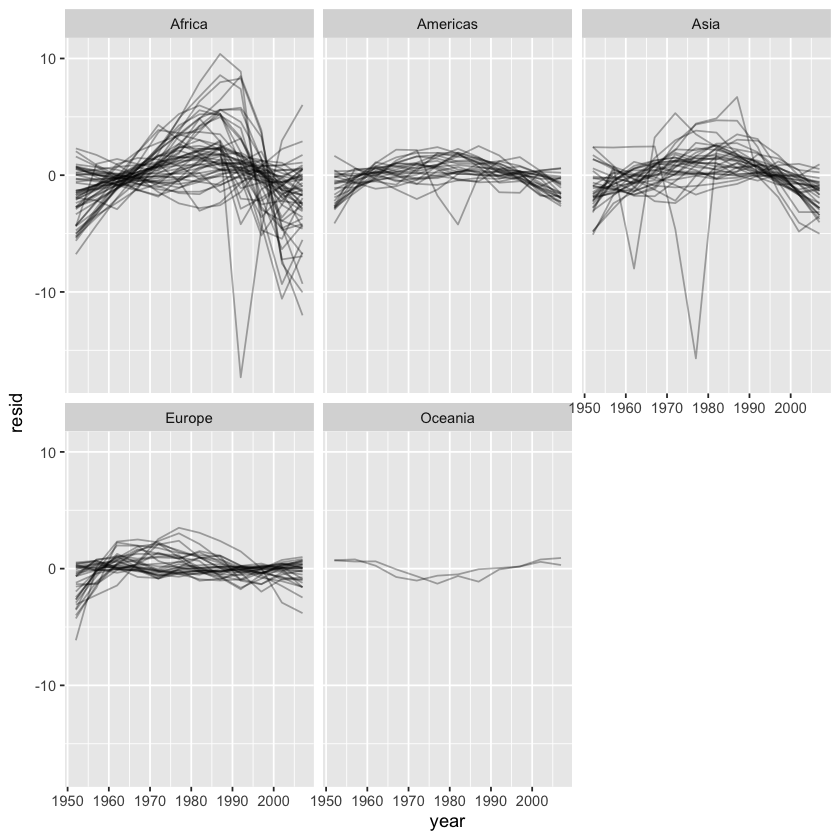

In [24]:
resids %>%
ggplot(aes(year, resid, group = country)) +
geom_line(alpha = 1/3) +
facet_wrap(~continent)

- 플롯을 보면 가벼운 패턴은 포착하지 못한 것처럼 보인다. 또한, 아프리카 대륙의 플롯에서는 매우 큰 잔차값을 일부 볼 수 있으며, 
이는 그 값에 대해 모델이 잘 맞지 않는다는 흥미로운 점을 발견할 수 있다.

### 모델의 성능

모델의 잔차를 탐색하는 대신, 모델의 성능에 대한 일반적인 측정값을 살펴볼 수 있다.<br>
`broom`패키지는 모델을 많은 타이디 데이터로 전환하는 일반적인 함수들을 제공한다.<br>
<br>
`broom::glance()` : 모델의 성능 메트릭을 추출하기 위해 사용<br>
이 함수를 모델에 적용하면 한 줄로 이루어진 데이터프레임이 생성된다.

In [25]:
broom::glance(nz_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9535846,0.9489431,0.8043472,205.4459,5.407324e-08,1,-13.32064,32.64128,34.096,6.469743,10,12


- `mutate()`와 `unnest()`를 사용하여 국가별로 하나의 행이 존재하는 데이터프레임을 만들 수 있다.

In [26]:
by_country %>%
mutate(glance = map(model, broom::glance)) %>%
unnest(glance) %>% head

country,continent,data,model,resids,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<fct>,<fct>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02, -1.106295e+00, -9.519382e-01, -6.635816e-01, -1.722494e-02, 6.741317e-01, 1.647488e+00, 1.686845e+00, 1.278202e+00, 7.535583e-01, -5.340851e-01, -1.544728e+00, -1.222372e+00",0.9477123,0.9424835,1.2227880,181.24941,9.835213e-08,1,-18.346935,42.693870,44.148590,14.9521045,10,12
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.562962

- 그렇지만 여전히 모든 리스트-열을 포함하고 있으므로 이는 우리가 원하는 결과물이 아니다.<br> 
이것은 `unnest()`를 단일 행의 데이터프레임에 적용했을 때의 기본 동작이다. 이 열을 숨기기 위해서는 `.drop = TRUE`를 사용하면 된다.

In [27]:
glance <- by_country %>%
mutate(glance = map(model, broom::glance)) %>%
unnest(glance, .drop = TRUE)
glance %>% head

Warning message:
“The `.drop` argument of `unnest()` is deprecated as of tidyr 1.0.0.
All list-columns are now preserved.”


country,continent,data,model,resids,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<fct>,<fct>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02, -1.106295e+00, -9.519382e-01, -6.635816e-01, -1.722494e-02, 6.741317e-01, 1.647488e+00, 1.686845e+00, 1.278202e+00, 7.535583e-01, -5.340851e-01, -1.544728e+00, -1.222372e+00",0.9477123,0.9424835,1.2227880,181.24941,9.835213e-08,1,-18.346935,42.693870,44.148590,14.9521045,10,12
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.562962

- 유용한 정보가 많이 포함되었지만 인쇄되지 않은 변수에 주목해본다. 이 데이터프레임을 사용하면 잘 맞지 않는 모델을 찾을 수 있다.

In [28]:
glance %>%
arrange(r.squared) %>% 
head

country,continent,data,model,resids,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<fct>,<fct>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Rwanda,Africa,"1952.0000, 1957.0000, 1962.0000, 1967.0000, 1972.0000, 1977.0000, 1982.0000, 1987.0000, 1992.0000, 1997.0000, 2002.0000, 2007.0000, 40.0000, 41.5000, 43.0000, 44.1000, 44.6000, 45.0000, 46.2180, 44.0200, 23.5990, 36.0870, 43.4130, 46.2420, 2534927.0000, 2822082.0000, 3051242.0000, 3451079.0000, 3992121.0000, 4657072.0000, 5507565.0000, 6349365.0000, 7290203.0000, 7212583.0000, 7852401.0000, 8860588.0000, 493.3239, 540.2894, 597.4731, 510.9637, 590.5807, 670.0806, 881.5706, 847.9912, 737.0686, 589.9445, 785.6538, 863.0885","132.205, -0.04583147, -2.741949, -1.012791, 0.716366, 2.045523, 2.774681, 3.403838, 4.850995, 2.882153, -17.30969, -4.592533, 2.962625, 6.020782, -143.6964, -2.740323, 1.389955, 2.692936, 3.395916, 3.998897, 5.419878, 3.424859, -16.79316, -4.10218, 3.426801, 6.458782, 2, 42.74195, 42.51279, 42.28363, 42.05448, 41.82532, 41.59616, 41.367, 41.13785, 40.90869, 40.67953, 40.45038, 40.22122, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 40, 41.5, 43, 44.1, 44.6, 45, 46.218, 44.02, 23.599, 36.087, 43.413, 46.242, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 4.000000e+01, 4.150000e+01, 4.300000e+01, 4.410000e+01, 4.460000e+01, 4.500000e+01, 4.621800e+01, 4.402000e+01, 2.359900e+01, 3.608700e+01, 4.341300e+01, 4.624200e+01, 2.534927e+06, 2.822082e+06, 3.051242e+06, 3.451079e+06, 3.992121e+06, 4.657072e+06, 5.507565e+06, 6.349365e+06, 7.290203e+06, 7.212583e+06, 7.852401e+06, 8.860588e+06, 4.933239e+02, 5.402894e+02, 5.974731e+02, 5.109637e+02, 5.905807e+02, 6.700806e+02, 8.815706e+02, 8.479912e+02, 7.370686e+02, 5.899445e+02, 7.856538e+02, 8.630885e+02, -2.741949e+00, -1.012791e+00, 7.163660e-01, 2.045523e+00, 2.774681e+00, 3.403838e+00, 4.850995e+00, 2.882153e+00, -1.730969e+01, -4.592533e+00, 2.962625e+00, 6.020782e+00",0.01715964,-0.081124401,6.558269,0.1745923,0.6848927,1,-38.50205,83.00411,84.45883,430.1090,10,12
Botswana,Africa,"1952.0000, 1957.0000, 1962.0000, 1967.0000, 1972.0000, 1977.0000, 1982.0000, 1987.0000, 1992.0000, 1997.0000, 2002.0000, 2007.0000, 47.6220, 49.6180, 51.5200, 53.2980, 56.0240, 59.3190, 61.4840, 63.6220, 62.7450, 52.5560, 46.6340, 50.7280, 442308.0000, 474639.0000, 512764.0000, 553541.0000, 619351.0000, 781472.0000, 970347.0000, 1151184.0000, 1342614.0000, 1536536.0000, 1630347.0000, 1639131.0000, 851.2411, 918.2325, 983.6540, 1214.7093, 2263.6111, 3214.8578, 4551.1421, 6205.8839, 7954.1116, 8647.1423, 11003.6051, 12569.8518","-65.49586, 0.06066853, -5.307115, -3.614458, -2.015801, -0.5411434, 1.881514, 4.873171, 6.734829, 8.569486, 7.389143, -3.103199, -9.328542, -5.537885, -189.1313, 3.627451, -0.4656616, 0.8496905, 3.113043, 5.945395, 7.647747, 9.323099, 7.983451, -2.668197, -9.052845, -5.421493, 2, 52.92912, 53.23246, 53.5358, 53.83914, 54.14249, 54.44583, 54.74917, 55.05251, 55.35586, 55.6592, 55.96254, 56.26588, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 47.622, 49.618, 51.52, 53.298, 56.024, 59.319, 6

가장 좋지 않은 모델은 아프리카 대륙에서 나타난다. 이는 플롯으로 다시 확인해보면 상대적으로 적은 수의 관측값과
이산형 변수가 존재핳기 때문에 `geom_jitter()`함수가 효과적이다.

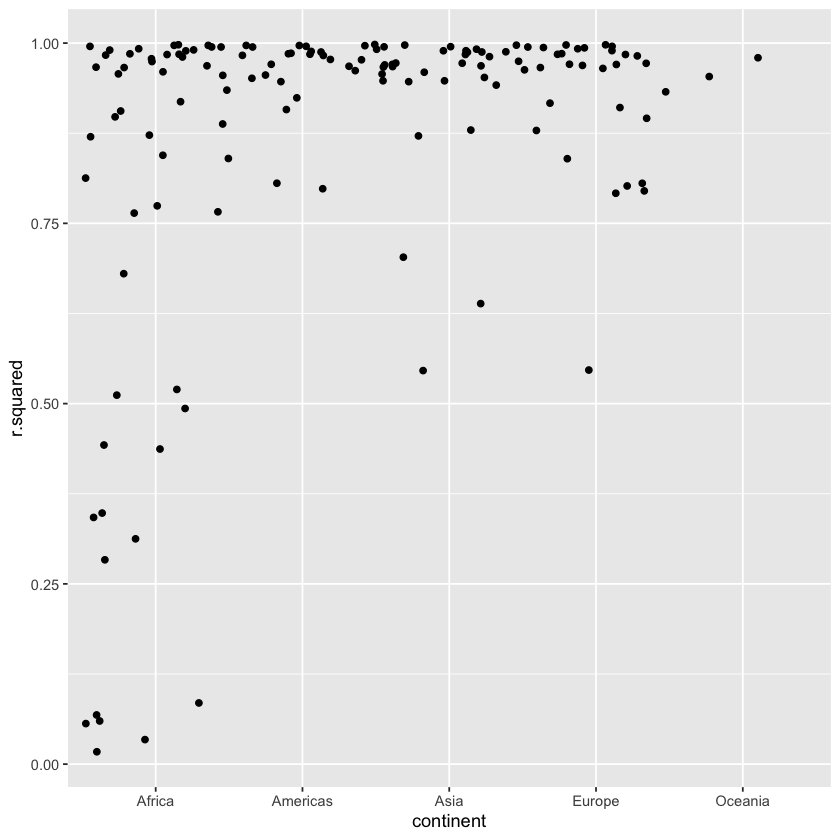

In [29]:
glance %>%
ggplot(aes(continent, r.squared)) +
geom_jitter(width = 0.5)

- $R^2$값이 작은 국가를 제거한 데이터를 플롯으로 나타내면

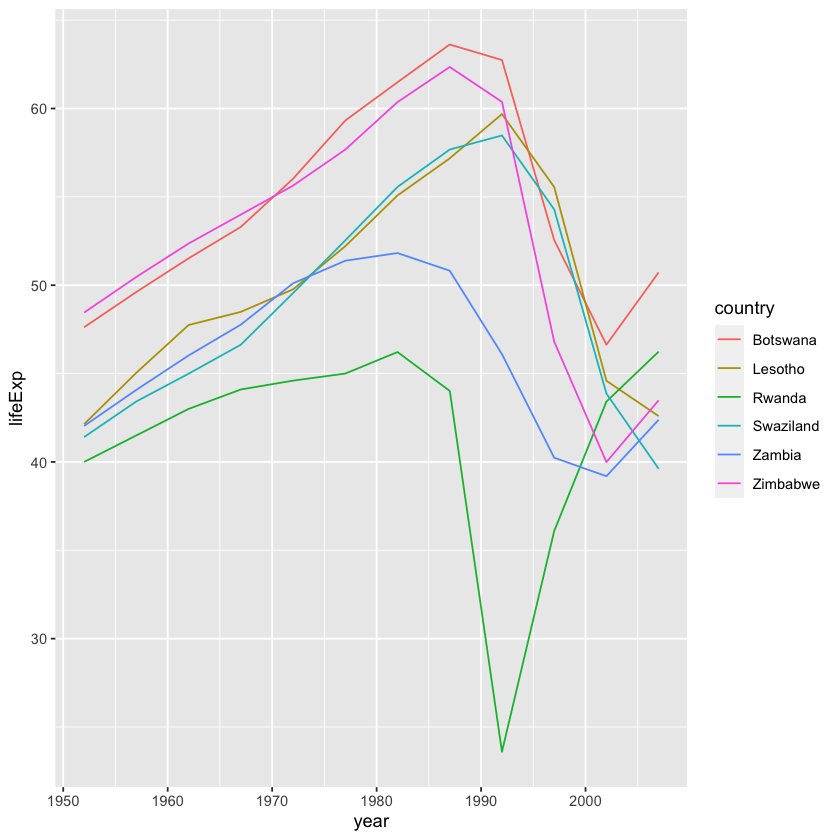

In [30]:
bad_fit <- filter(glance, r.squared < 0.25)

gapminder %>%
semi_join(bad_fit, by = "country") %>%
ggplot(aes(year, lifeExp, color = country)) +
geom_line()

- 다른 배경지식을 사용하면 여기에는 HIV/AIDS 전염병과 르완다 집단 학살의 비극이라는 두 가지 주요 효과가 있다는 것을 알 수 있다.

## 리스트-열(List-column)

- 데이터프레임은 같은 길이의 벡터로 명명된 리스트로 이루어져 있으며, 이는 리스트-열이 데이터프레임의 정의에 내재되어 있다는 것이다.<br>
리스트는 벡터이므로 리스트를 데이터프레임의 열로 사용하는 것은 타당한 방법이다. <br>그러나 베이스 R에서는 리스트-열을 쉽게 만들 수 없으며 `data.frame()`은
리스트를 열의 리스트로 처리한다.

In [31]:
data.frame(x = list(1:3, 3:5))

x.1.3,x.3.5
<int>,<int>
1,3
2,4
3,5


`I()`를 사용하면 `data.frame()`에서 이를 막을 수는 있지만, 다음과 같이 제대로 출력되지 않는다.

In [32]:
data.frame(
    x = I(list(1:3, 3:5)),
    y = c("1, 2", "3, 4, 5")
    )

x,y
<I<list>>,<chr>
"1, 2, 3","1, 2"
"3, 4, 5","3, 4, 5"


- `tibble()`은 입렵값을 수정하지 않고도 더 나은 출력 방법을 제공하여 이 문제를 해결할 수 있다.

In [33]:
tibble(
    x = list(1:3, 3:5),
    y = c("1, 2", "3, 4, 5")
    )

x,y
<list>,<chr>
"1, 2, 3","1, 2"
"3, 4, 5","3, 4, 5"


- `tribble()`은 필요한 리스트를 자동으로 생성할 수 있는 더 간단한 방법이다.

In [34]:
tribble(
    ~x, ~y,
    1:3, "1, 2",
    3:5, "3, 4, 5"
    )

x,y
<list>,<chr>
"1, 2, 3","1, 2"
"3, 4, 5","3, 4, 5"


- 리스트-열은 중급 데이터 구조로 가장 유용하다. 대부분의 R함수가 원자 벡터 또는 데이터프레임에서 동작하기 때문에 리스트-열로 직접 작업하기는 어렵다.<br>
데이터프레임에서 연관된 항목을 유지하는 장점을 누리려면 약간의 번거로움이 따를 수 밖에 없다.<br>
일반적으로 리스트-열 파이프 라인에는 효과적인 측면이 세 가지이다.

> 1) nest(), summarize() + list() 또는 mutate() + map 함수 중 하나를 사용하여 리스트-열을 생성한다.<br>
2) 기존의 리스트-열을 map(), map2() 또는 pmap()으로 변형하여 다른 중간 리스트-열을 만든다. 예를 들어 이전 사례에서 데이터프레임의 리스트-열을 변형하여
모델의 리스트-열을 생성하였다.<br>
3) 리스트-열을 데이터프레임 또는 원자 벡터로 다시 단순화한다.

### 중첩을 사용하여 생성하기

- `nest()` 함수는 중첩된 데이터프레임(즉, 데이터프레임의 리스트-열로 이루어진 데이터프레임)을 생성한다. 중첩된 데이터프레임의 각 행은 메타 관측값을 나타낸다.<br>
다른 열은 관측값을 정의하는 변수(예 : 국가와 대륙)를 제공하고 데이터프레임의 리스트-열은 메타 관측값을 구성하는 개별 관측값을 제공한다.<br>
`nest()`를 사용하는 두 가지 방법이 있는데 앞서서는 그룹화된 데이터프레임에 사용하는 방법이였고<br>
그룹화된 데이터프레임에 적용할 때 `nest()`는 그룹화된 열은 그대로 유지하고 그 외의 모든 항목은 리스트-열로 묶는다.

In [35]:
gapminder %>%
group_by(country, continent) %>%
nest() %>% head

country,continent,data
<fct>,<fct>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231"
Argentina,Americas,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 62.485, 64.399, 65.142, 65.634, 67.065, 68.481, 69.942, 70.774, 71.868, 73.275, 74.340, 75.320, 17876956.000, 19610538.000, 21283783.000, 22934225.000, 24779799.000, 26983828.000, 29341374.000, 31620918.000, 33958947.000, 36203463.000, 38331121.000, 40301927.000, 5911.315, 6856.856, 7133.166, 8052.953, 9443.039, 10079.027, 8997.897, 9139.671, 9308.419, 10967.282, 8797.641, 12779.380"
Australia,Oceania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 69.120, 70.330, 70.930, 71.100, 71.930, 73.490, 74.740, 76.320, 77.560, 78.830, 80.370, 81.235, 8691212.000, 9712569.000, 10794968.000, 11872264.000, 13177000.000, 14074100.000, 15184200.000, 16257249.000, 17481977.000, 18565243.000, 19546792.000, 20434176.000, 10039.596, 10949.650, 12217.227, 14526.125, 16788.629, 18334.198, 19477.009, 21888.889, 23424.767, 26997.937, 30687.755, 34435.367"


- 그룹화되지 않은 데이터프레임에서도 중첩하고자 하는 열을 지정하면 사용할 수 있다.

In [36]:
gapminder %>%
nest(year:gdpPercap) %>%
head

Warning message:
“All elements of `...` must be named.
Did you want `data = year:gdpPercap`?”


country,continent,data
<fct>,<fct>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231"
Argentina,Americas,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 62.485, 64.399, 65.142, 65.634, 67.065, 68.481, 69.942, 70.774, 71.868, 73.275, 74.340, 75.320, 17876956.000, 19610538.000, 21283783.000, 22934225.000, 24779799.000, 26983828.000, 29341374.000, 31620918.000, 33958947.000, 36203463.000, 38331121.000, 40301927.000, 5911.315, 6856.856, 7133.166, 8052.953, 9443.039, 10079.027, 8997.897, 9139.671, 9308.419, 10967.282, 8797.641, 12779.380"
Australia,Oceania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 69.120, 70.330, 70.930, 71.100, 71.930, 73.490, 74.740, 76.320, 77.560, 78.830, 80.370, 81.235, 8691212.000, 9712569.000, 10794968.000, 11872264.000, 13177000.000, 14074100.000, 15184200.000, 16257249.000, 17481977.000, 18565243.000, 19546792.000, 20434176.000, 10039.596, 10949.650, 12217.227, 14526.125, 16788.629, 18334.198, 19477.009, 21888.889, 23424.767, 26997.937, 30687.755, 34435.367"


### 벡터화 함수에서 생성하기

- 몇가지 유용한 함수는 원자 벡터를 입력하여 리스트를 반환한다. 예를 들어 `stringr::str_split()`.<br>
`mutate` 함수 안에서 이를 사용하면 리스트-열을 얻을 수 있다.

In [37]:
df <- tribble(
    ~x1,
    "a,b,c",
    "d,e,f,g"
    )
df

x1
<chr>
"a,b,c"
"d,e,f,g"


In [38]:
df %>%
mutate(x2 = stringr::str_split(x1, ","))

x1,x2
<chr>,<list>
"a,b,c","a, b, c"
"d,e,f,g","d, e, f, g"


`unnest()` 함수는 벡터 리스트 다루는 방법을 알고 있다.

In [39]:
df %>%
mutate(x2 = stringr::str_split(x1, ",")) %>%
unnest()

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(x2)`”


x1,x2
<chr>,<chr>
"a,b,c",a
"a,b,c",b
"a,b,c",c
"d,e,f,g",d
"d,e,f,g",e
"d,e,f,g",f
"d,e,f,g",g


- 이 패턴을 많이 사용하는 경우에는 공통 패턴을 포함하는 `tidyr:separate_row()`를 반드시 확인한다.<br>
이 패턴의 또 다른 예제는 purr의 `map()`, `map2()`, `pmap()` 함수를 사용하는 것이다.

In [40]:
sim <- tribble(
    ~f, ~params,
    "runif", list(min = -1, max = -1),
    "rnorm", list(sd = 5),
    "rpois", list(lambda = 10)
    )
sim

f,params
<chr>,<list>
runif,"-1, -1"
rnorm,5
rpois,10


In [41]:
sim %>%
mutate(sims = invoke_map(f, params, n = 10))

f,params,sims
<chr>,<list>,<list>
runif,"-1, -1","-1, -1, -1, -1, -1, -1, -1, -1, -1, -1"
rnorm,5,"0.8244597185, 7.4269963753, -0.2802207175, 2.1495297875, -0.0002438665, 6.1046357552, 6.5391574008, -8.5557067705, -2.5508686388, 2.3913567687"
rpois,10,"9, 14, 9, 14, 8, 8, 10, 14, 9, 16"


- `sim`은 더블형과 정수형 벡터 둘 다 포함하므로 기술적으로 똑같지 않다. 그러나 정수형과 더블형 벡터 모두 수치형 벡터이므로 많은 문제가 발생하지 않는다.

### 다중값 요약에서 생성하기

`summarize()`의 한 가지 제약은 단일 값을 반환하는 요약 함수로만 동작한다는 것이다.<br>
즉, 임의 길이의 벡터를 반환하는 `quantile()`과 같은 함수와 함께 사용할 수 없다는 것을 의미한다.

In [42]:
mtcars %>%
group_by(cyl) %>%
summarize(q = quantile(mpg))

`summarise()` has grouped output by 'cyl'. You can override using the `.groups`
argument.


cyl,q
<dbl>,<dbl>
4,21.40
4,22.80
4,26.00
4,30.40
4,33.90
6,17.80
6,18.65
6,19.70
6,21.00


- 결과를 리스트로 넣기<br>
각각의 요약은 길이가 1인 리스트(벡터)이므로 `summarize()`함수의 규칙을 따른다.

In [43]:
mtcars %>% 
group_by(cyl) %>%
summarize(q = list(quantile(mpg)))

cyl,q
<dbl>,<list>
4,"21.4, 22.8, 26.0, 30.4, 33.9"
6,"17.80, 18.65, 19.70, 21.00, 21.40"
8,"10.40, 14.40, 15.20, 16.25, 19.20"


- `unnest()`를 사용하여 유용한 결과를 얻기 위해서는 확률값을 포착해야 한다.

In [44]:
probs <- c(0.01, 0.25, 0.5, 0.75, 0.99)
mtcars %>%
group_by(cyl) %>%
summarize(p = list(probs), q = list(quantile(mpg, probs))) %>%
unnest()

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(p, q)`”


cyl,p,q
<dbl>,<dbl>,<dbl>
4,0.01,21.410
4,0.25,22.800
4,0.50,26.000
4,0.75,30.400
4,0.99,33.750
6,0.01,17.818
6,0.25,18.650
6,0.50,19.700
6,0.75,21.000


### 명명된 리스트에서 생성하기

- 리스트-열이 있는 데이터프레임은 다음의 일반적인 문제에 대한 해결책을 제공한다. 리스트의 내용과 요소, 둘 다 반복하고자 할 때는 어떻게 할 것인가?<br>
모든 것을 하나의 객체로 묶으려고 하는 대신 데이터프레임을 만드는 것이 더 쉽다. 하나의 열은 요소를 포함할 수 있고, 다른 하나의 열은 리스트를 포함할 수 있다.<br>
리스트에서 이러한 데이터프레임을 만드는 쉬운 방법은 `tibble::enframe()`을 사용하는 것이다.

In [45]:
x <- list(
    a=1:5,
    b=3:4,
    c=5:6)

df <- enframe(x)
df

name,value
<chr>,<list>
a,"1, 2, 3, 4, 5"
b,"3, 4"
c,"5, 6"


- 이 구조의 장점은 간단한 방법으로 일반화한다는 것이다. 메타 데이터에 문자형 벡터가 있는 경우 이름(name)에는 유용하지만 다른 유형의 데이터 또는 여러 벡터가 있는
경우 유용하지 않다.

In [46]:
df %>%
mutate(
    smry = map2_chr(
        name,
        value,
        ~ stringr::str_c(.x, ": ", .y[1])
        )
    )

name,value,smry
<chr>,<list>,<chr>
a,"1, 2, 3, 4, 5",a: 1
b,"3, 4",b: 3
c,"5, 6",c: 5


### 리스트-열 단순화하기

- 데이터 처리 및 시각화 기술을 적용하기 위해서는 리스트-열을 일반 열(원자 벡터) 또는 열의 집합으로 다시 단순화해야 한다.<br>
더 간단한 구조로 축소하기 위해 사용할 기법은 요소당 하나의 값을 사용하는지 또는 여러 값을 사용하는지에 따라 달라진다.

> 단일 값을 원하는 경우 `map_lgl()`, `map_int()`, `map_dbl()`, `map_chr()`에 `mutate()`를 사용하여 원자 벡터를 생성한다.<br>
> 많은 값을 원하는 경우 `unnest()`를 사용하여 리스트-열을 일반 열로 다시 변환하고 필요한 만큼 행을 반복한다.

#### 리스트를 벡터로 만들기

- 리스트 열을 원자 벡터로 줄일 수 있다면 리스트 열은 일반 열이 될 것이다.<br>
예를 들어 타입과 길이를 가진 객체는 항상 요약할 수 있으므로 다음 코드는 리스트 열의 종류에 관계없이 작동할 것이다.

In [47]:
df <- tribble(
    ~x,
    letters[1:5],
    1:3,
    runif(5)
    )
df

x
<list>
"a, b, c, d, e"
"1, 2, 3"
"0.5219118, 0.7152954, 0.5081047, 0.6517999, 0.3156121"


In [48]:
df %>% mutate(
    type = map_chr(x, typeof),
    length = map_int(x, length)
    )

x,type,length
<list>,<chr>,<int>
"a, b, c, d, e",character,5
"1, 2, 3",integer,3
"0.5219118, 0.7152954, 0.5081047, 0.6517999, 0.3156121",double,5


- 이는 기본 tbl print 방법에서 얻은 것과 같은 기본 정보지만, 여기에서는 필터링 용도로 사용할 수 있다. <br>
다차원적인 리스트에 대해서 작동하지 않는 부분을 필터링하고자 할 때 유용한 기법이다.<br>
`map_*()`단축어를 기억하자. 예를 들어 `map_chr(x, "apple")`를 사용하여 x의 각 요소에 대해 apple에 저장된 문자열을 추출할 수 있다. 이는 중첩된 리스트를 일반 열로
분리할 때 유용하다. 리스트의 요소가 누락된 경우 (NULL을 반환한느 대신) 사용할 값을 제공하는 `.null`인수를 사용한다.

In [49]:
df <- tribble(
    ~x,
    list(a=1, b=2),
    list(a=2, c=4)
    )
df

x
<list>
"1, 2"
"2, 4"


In [50]:
df %>% mutate(
    a = map_dbl(x, "a"),
    b = map_dbl(x, "b", .null = NA_real_)
    )

x,a,b
<list>,<dbl>,<dbl>
"1, 2",1,2
"2, 4",2,NA


#### 중첩 해제하기

- `unnest()`는 리스트-열의 각 요소를 한 줄씩 일반 열로 반복하며 동작한다.<br>
예를 들어 다음의 아주 간단한 예제에서는 (y의 첫번째 요소 길이가 4이므로) 첫 번째 행은 4번 반복하고 두 번째 행은 한 번만 반복한다.

In [51]:
tibble(x = 1:2, y = list(1:4, 1)) %>% unnest(y)

x,y
<int>,<dbl>
1,1
1,2
1,3
1,4
2,1


- 즉, 이는 다른 수의 요소가 포함된 두 개의 열을 동시에 중첩 해제할 수 없다는 것을 의미한다.

In [52]:
df1 <- tribble(
    ~x, ~y, ~z,
    1, c("a", "b"), 1:2,
    2, "c", 3
    )
df1

x,y,z
<dbl>,<list>,<list>
1,"a, b","1, 2"
2,c,3


In [53]:
df1 %>% unnest(y, z)

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(y, z))`, with `mutate()` if needed”


x,y,z
<dbl>,<chr>,<dbl>
1,a,1
1,b,2
2,c,3


In [54]:
df2 <- tribble(
    ~x, ~y, ~z,
    1, "a", 1:2,
    2, c("b","c"), 3
    )
df2

x,y,z
<dbl>,<list>,<list>
1,a,"1, 2"
2,"b, c",3


In [55]:
df2 %>% unnest(y, z)

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(y, z))`, with `mutate()` if needed”


x,y,z
<dbl>,<chr>,<dbl>
1,a,1
1,a,2
2,b,3
2,c,3


- 데이터프레임의 리스트-열을 중첩 해제할 때도 같은 원칙이 적용된다. 각 행의 모든 데이터프레임이 같은 개수의 행을 가지고 있다면 여러 개의 리스트-열을 중첩 해제할 수 있다.

### broom으로 타이디 데이터 만들기

- broom 패키지는 모델을 타이디 데이터프레임으로 변환할 수 있는 세 가지의 일반적인 도구를 제공한다.

> `broom::glance(model)`은 각 모델에 대한 행을 반환한다. 각 열에는 모델 요약(모델 성능 척도 또는 복잡성 또는 둘의 조합)이 표시된다.<br>
> `broom::tidy(model)`은 모델의 각 계수에 대한 행을 반환한다. 각 열의 추정값 또는 변동성에 대한 정보를 제공한다.<br>
> `broom::augment(model, data)`는 data의 각 행에 잔차와 같은 영향 통계량을 추가하여 반환한다.